## Visualizing the experiments

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Utility functions

In [2]:
def plot_minimum(df: pd.DataFrame, by, ax):
    group_df = df.groupby(["learning_rate", by]).mean("learning_rate")
    min_points = group_df.groupby([by])["loss"].idxmin()
    sns.scatterplot(
        group_df.loc[min_points],
        x="log learning rate",
        y="log loss",
        s=100,
        marker="*",
        color="gray",
        edgecolor="black",
        ax=ax,
    )


def plot(df, by, ax, use_mup=True):
    sns.lineplot(
        df,
        x="log learning rate",
        y="log loss",
        hue=by,
        palette="colorblind",
        ax=ax,
    )
    plot_minimum(df, by, ax)
    ax.set_title(f"{'muP' if use_mup else 'SP'} [{by}]")


def load_data(file):
    df = pd.read_csv(file).sort_values(
        ["learning_rate", "embed_dim", "depth", "num_steps"], ascending=True
    )
    df["log learning rate"] = np.log(df["learning_rate"])
    df["log loss"] = np.log(df["loss"])
    return df

### Demo results

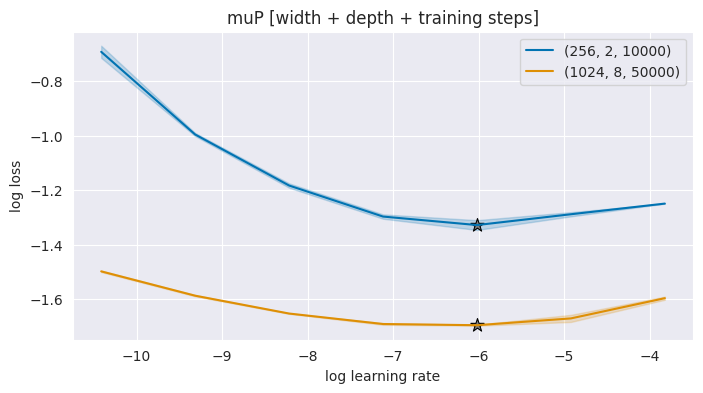

In [3]:
sns.set_style("darkgrid")
df = load_data("../results/demo.csv")
fig = plt.figure(figsize=(8, 4))

df["width + depth + training steps"] = list(
    zip(df["embed_dim"], df["depth"], df["num_steps"])
)
plot(
    df[
        ((df["embed_dim"] == 256) & (df["depth"] == 2) & (df["num_steps"] == 10000))
        | ((df["embed_dim"] == 1024) & (df["depth"] == 8) & (df["num_steps"] == 50000))
    ].sort_values(["embed_dim"]),
    "width + depth + training steps",
    plt.gca(),
)
plt.savefig("../results/demo.svg")

### Detailed results

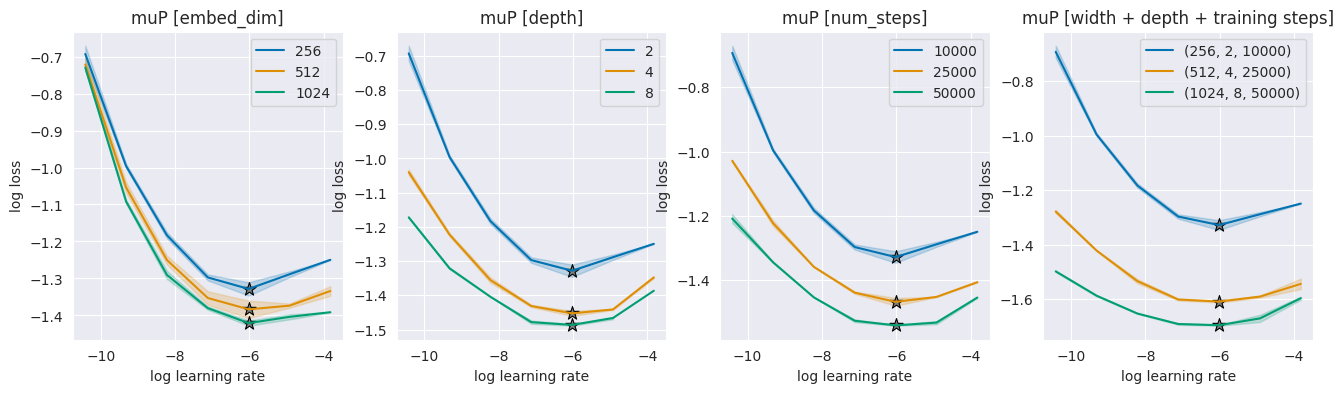

In [4]:
sns.set_style("darkgrid")
df = load_data("../results/results.csv")
df = df[df["use_mup"] == True]
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

plot(df[(df["num_steps"] == 10000) & (df["depth"] == 2)], "embed_dim", axs[0])

plot(
    df[(df["num_steps"] == 10000) & (df["embed_dim"] == 256) & (df["depth"] != 6)],
    "depth",
    axs[1],
)

plot(df[(df["embed_dim"] == 256) & (df["depth"] == 2)], "num_steps", axs[2])

df["width + depth + training steps"] = list(
    zip(df["embed_dim"], df["depth"], df["num_steps"])
)
plot(
    df[
        ((df["embed_dim"] == 256) & (df["depth"] == 2) & (df["num_steps"] == 10000))
        | ((df["embed_dim"] == 512) & (df["depth"] == 4) & (df["num_steps"] == 25000))
        | ((df["embed_dim"] == 1024) & (df["depth"] == 8) & (df["num_steps"] == 50000))
    ].sort_values(["embed_dim"]),
    "width + depth + training steps",
    axs[3],
)
plt.savefig("../results/scaling.svg")

### Comparison muP vs. SP

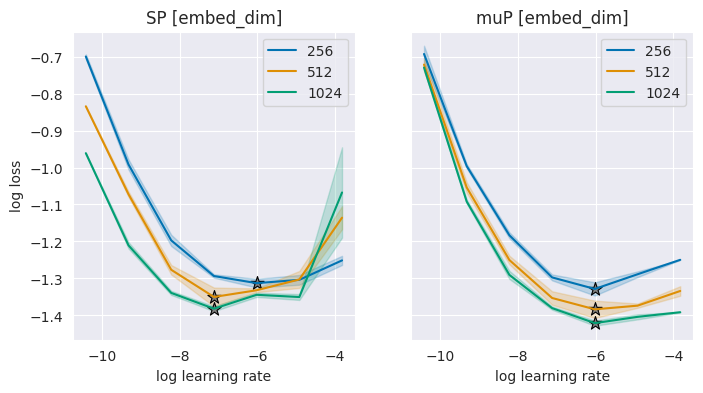

In [5]:
sns.set_style("darkgrid")
df = load_data("../results/results.csv")
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

plot(
    df[(df["use_mup"] == False) & (df["num_steps"] == 10000) & (df["depth"] == 2)],
    "embed_dim",
    axs[0],
    use_mup=False,
)
plot(
    df[(df["use_mup"] == True) & (df["num_steps"] == 10000) & (df["depth"] == 2)],
    "embed_dim",
    axs[1],
)